## StarAgile AI & Deep Learning Module Assignment
### Submitted by VINAY.M on 20-09-2023


- Scope - AI & Deep Learning Module Assignment - Leaf Disease Detection

- Apply various techniques to apply and detect whether the Cassava / corn leaf is suffering from a disease or it’s healthy

- Dataset Link : https://drive.google.com/drive/folders/1j8S2VckwDYOzfJQg71sK1XGy8J778djN?usp=sharing



In [1]:
# Given Data contains images from 4 folders with leaf health status
# 1. Blight -----> 0
# 2. Common_Rust -----> 1
# 3. Gray_Leaf_Spot -----> 2
# 4. Healthy -----> 3
# Since Laptop is not capable of creating models and Modelling will be performed with Google Colab
# StarAgile Given data extracted and re-uploaded to personal google drive
# Mypath
# /content/drive/MyDrive/DS_Datasets/Leaf_Disease_Detection

In [2]:
# Mounting Google Drive for Getting access to uploaded leaf Image
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Import / Installing Important Libraries**

In [ ]:
# Uncomment below line and run, if not installed
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
import tensorflow as tf
import sys
import os

In [4]:
print ('Running in colab:', 'google.colab' in sys.modules)

Running in colab: True


**Remove Dodgy Images**

In [5]:
import cv2
import imghdr

In [6]:
data_path = '/content/drive/MyDrive/DS_Datasets/Leaf_Disease_Detection/'

In [7]:
image_ext_required = ['jpeg','jpg','bmp','png']

In [9]:
count = 0
for image_class in os.listdir(data_path):
  for image in os.listdir(os.path.join(data_path, image_class)):
    img_path = os.path.join(data_path, image_class, image)

    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)

      if tip not in image_ext_required:
        print("Image is not of desired extention", format(img_path))
        count = count + 1
        os.remove(img_path)
    except Exception as e:
      print("Issue with the image", format(img_path))
      count = count + 1
      os.remove(img_path)
print(f"Total Images Removed: {count}")

Total Images Removed: 0


In [10]:
folders = sorted(os.listdir(data_path))
folders

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [11]:
# Create a Dictionary for folder names
folderLabels = {}
for index, value in enumerate(folders):
  folderLabels[value] = index
folderLabels

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [13]:
class_names = list(folderLabels.keys())
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

**Loading of Training Data**

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
datasets = tf.keras.utils.image_dataset_from_directory(data_path)
datasets.class_names

Found 4184 files belonging to 4 classes.


['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [16]:
data_iterator = datasets.as_numpy_iterator()

In [17]:
data_iterator

In [18]:
batch = data_iterator.next()

In [27]:
class_labels = {}
for index, value in enumerate(folders):
  class_labels[index] = value
class_labels


{0: 'Blight', 1: 'Common_Rust', 2: 'Gray_Leaf_Spot', 3: 'Healthy'}

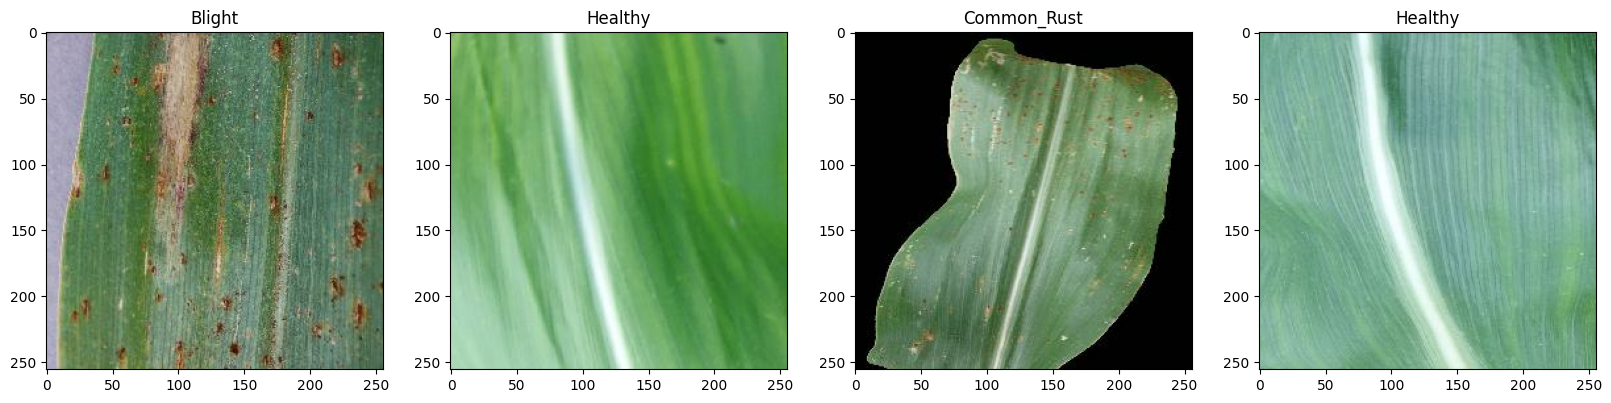

In [28]:
import random
num_random_images = 4
random_indices = random.sample(range(len(batch[0])), num_random_images)

fig, ax = plt.subplots(ncols=num_random_images, figsize=(20, 20))

for idx, rand_idx in enumerate(random_indices):
    img = batch[0][rand_idx]
    name = batch[1][rand_idx]

    ax[idx].imshow(img.astype(int))
    class_label = class_labels.get(name, "Unknown")  # Look up class label from the dictionary
    ax[idx].set_title(class_label)

plt.show()

In [29]:
scaled_data = datasets.map(lambda x,y:(x/255,y))

In [30]:
scaled_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
scaled_data.as_numpy_iterator().next()

(array([[[[0.34901962, 0.53333336, 0.40784314],
          [0.5568628 , 0.7411765 , 0.6156863 ],
          [0.60784316, 0.7921569 , 0.6666667 ],
          ...,
          [0.5882353 , 0.7647059 , 0.6745098 ],
          [0.5176471 , 0.69411767, 0.6117647 ],
          [0.49411765, 0.67058825, 0.5921569 ]],
 
         [[0.38039216, 0.5647059 , 0.4392157 ],
          [0.5686275 , 0.7529412 , 0.627451  ],
          [0.60784316, 0.7921569 , 0.6666667 ],
          ...,
          [0.4862745 , 0.6627451 , 0.57254905],
          [0.4745098 , 0.6509804 , 0.5686275 ],
          [0.45490196, 0.6313726 , 0.5529412 ]],
 
         [[0.4117647 , 0.59607846, 0.47058824],
          [0.5568628 , 0.7411765 , 0.6156863 ],
          [0.58431375, 0.76862746, 0.6431373 ],
          ...,
          [0.5058824 , 0.68235296, 0.5921569 ],
          [0.5019608 , 0.6784314 , 0.59607846],
          [0.5254902 , 0.7019608 , 0.62352943]],
 
         ...,
 
         [[0.56078434, 0.7411765 , 0.6313726 ],
          [0.57254

In [32]:
print(len(scaled_data))
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)
test_size = int(len(scaled_data)*0.1)

131


In [33]:
train_size

91

In [34]:
val_size

26

In [35]:
test_size

13

In [36]:
train = scaled_data.take(train_size)
test = scaled_data.skip(train_size).take(test_size)
val = scaled_data.skip(train_size+test_size).take(val_size)

In [37]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# 256,256,3 , here 3 is channels (number of bands in an image)

**Train our CNN model on Training Dataset**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
labels = datasets.class_names
labels

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [40]:
model = Sequential()

# Conv2D layer with 16 filters, 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Conv2D layer with 32 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Conv2D layer with 16 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Flatten the output
model.add(Flatten())

# Dense layer with 128 units and ReLU activation
model.add(Dense(256, activation='relu'))

# 22 classes with softmax activation
model.add(Dense(len(datasets.class_names), activation='softmax'))

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

**Model Training**

In [43]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
from keras import callbacks
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
91/91 [==============================] - 33s 219ms/step - loss: 0.7443 - accuracy: 0.7002 - val_loss: 0.4225 - val_accuracy: 0.8233
Epoch 2/20
91/91 [==============================] - 21s 219ms/step - loss: 0.4385 - accuracy: 0.8231 - val_loss: 0.5112 - val_accuracy: 0.7873
Epoch 3/20
91/91 [==============================] - 21s 220ms/step - loss: 0.3653 - accuracy: 0.8527 - val_loss: 0.3209 - val_accuracy: 0.8606
Epoch 4/20
91/91 [==============================] - 31s 337ms/step - loss: 0.2882 - accuracy: 0.8853 - val_loss: 0.3640 - val_accuracy: 0.8474
Epoch 5/20
91/91 [==============================] - 21s 221ms/step - loss: 0.2680 - accuracy: 0.8959 - val_loss: 0.3348 - val_accuracy: 0.8498
Epoch 6/20
91/91 [==============================] - 20s 213ms/step - loss: 0.1941 - accuracy: 0.9238 - val_loss: 0.3939 - val_accuracy: 0.8534
Epoch 7/20
91/91 [==============================] - 31s 333ms/step - loss: 0.1644 - accuracy: 0.9433 - val_loss: 0.3509 - val_accuracy: 0.8762

In [45]:
#Model Training Ends

In [46]:
#Plotting the performance - Training Accuracy and Validation Accuracy

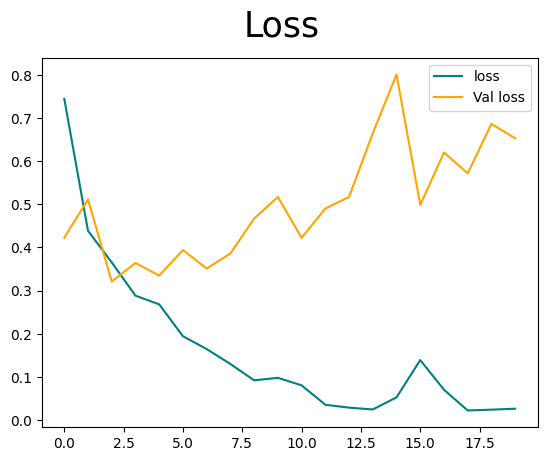

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
fig.suptitle("Loss", fontsize=25)
plt.legend(loc='upper right')
plt.show()


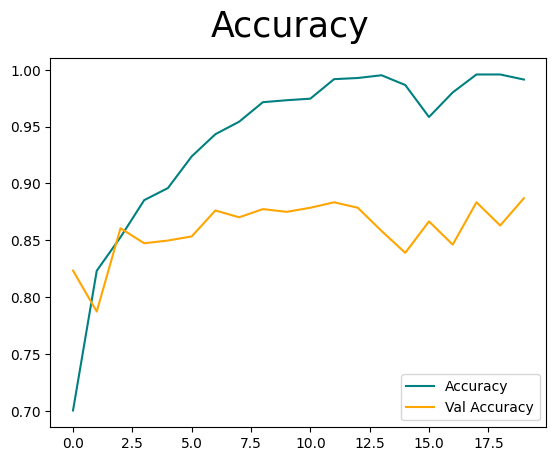

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.legend(loc='lower right')
plt.show()

In [49]:
#Evaluate

In [50]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [51]:
# Create an instance of the SparseCategoricalAccuracy metric.
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Call the `update_state` method for each input/label pair.
for X, y in test:
  metric.update_state(y, model.predict(X))

# Call the `result` method to get the final accuracy score.
accuracy = metric.result()

# Print the accuracy score.
print('Accuracy:', accuracy)

1/1 [==============================] - 0s 37ms/step
Accuracy: tf.Tensor(0.90625, shape=(), dtype=float32)


In [54]:
print(accuracy)

tf.Tensor(0.90625, shape=(), dtype=float32)


In [55]:
#Testing the model with external image

In [69]:
img = cv2.imread('/content/drive/MyDrive/DS_Datasets/test2.jpg')

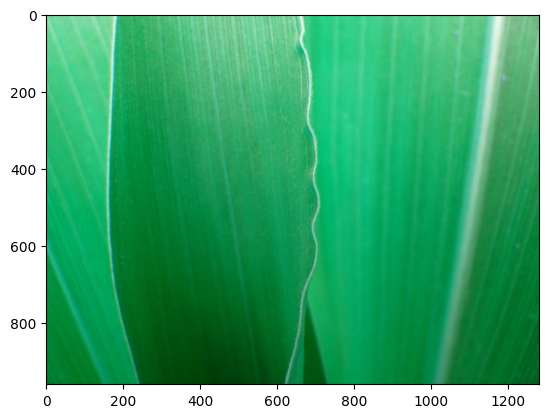

In [70]:
plt.imshow(img)
plt.show()

In [59]:
#Read as RBG

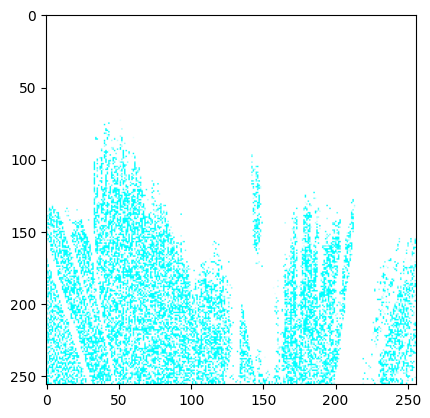

In [71]:
#resize
resized = tf.image.resize(img, (256,256))
plt.imshow(resized)
plt.show()

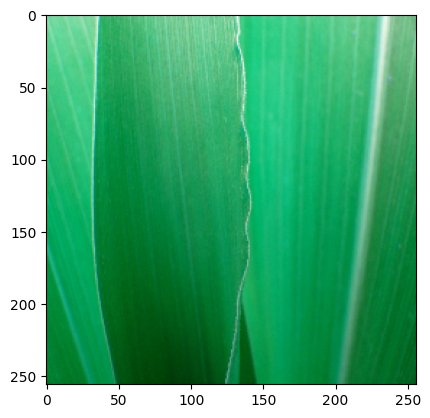

In [72]:
#resize
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [73]:
predictions = model.predict(np.expand_dims(resized/255,0))

1/1 [==============================] - 0s 18ms/step


In [74]:
predictions

array([[1.3324223e-04, 1.3283883e-03, 1.3164118e-04, 9.9840671e-01]],
      dtype=float32)

In [75]:
folders

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [76]:
class_labels

{0: 'Blight', 1: 'Common_Rust', 2: 'Gray_Leaf_Spot', 3: 'Healthy'}

In [77]:
for class_index, probability in enumerate(predictions[0]):
    class_label = class_labels.get(class_index, 'Unknown')
    print("Class: {}, Probability: {:.2f}%".format(class_label, probability * 100))

Class: Blight, Probability: 0.01%
Class: Common_Rust, Probability: 0.13%
Class: Gray_Leaf_Spot, Probability: 0.01%
Class: Healthy, Probability: 99.84%


In [78]:
for class_index, probability in sorted(enumerate(predictions[0]), key=lambda x: x[1], reverse=True):
  class_label = class_labels.get(class_index, 'Unknown')
  print("Class: {}, Probability: {:.2f}%".format(class_label, probability * 100))

Class: Healthy, Probability: 99.84%
Class: Common_Rust, Probability: 0.13%
Class: Blight, Probability: 0.01%
Class: Gray_Leaf_Spot, Probability: 0.01%


In [79]:
for class_index, probability in sorted(enumerate(predictions[0]), key=lambda x: x[1], reverse=True):
  if probability > 0.3:
    class_label = class_labels.get(class_index, 'Unknown')
    print("Top Class: {}, Probability: {:.2f}%".format(class_label, probability * 100))

Top Class: Healthy, Probability: 99.84%


In [87]:
from tensorflow.keras.models import load_model

In [89]:
#model.save(os.path.join("/content/drive/MyDrive/DS_Datasets/Leaf_Disease_Detection/",'leaf_Health_classifier.h5'))
model.save(os.path.join("/content/drive/MyDrive/DS_Datasets/Leaf_Disease_Detection/",'leaf_Health_classifier.keras'))

In [90]:
# Assignment Submitted by VINAY M on 20-09-2023